# **1. 비선형 활성화 함수(ActivationFunctions)**

* 신경망의 성능을 향상 시키기 위해 사용
* 선형 함수는 입력값과 가중치를 곱한 결과를 그대로 출력하기 때문에 신경망에서 여러개의 레이어를 사용한다면 최종 출력값은 입력값과 가중치의 선형 조합으로 표현되므로 입력 데이터의 비선형 관계를 표현할 수 없음
* 신경망이 입력 데이터의 비선형 관계를 잘 학습할 수 있도록 하기 위해 비선형 활성화 함수가 필요

### 1-1. 시그모이드

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x) :
    return 1 / (1 + np.exp(-x))

In [3]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

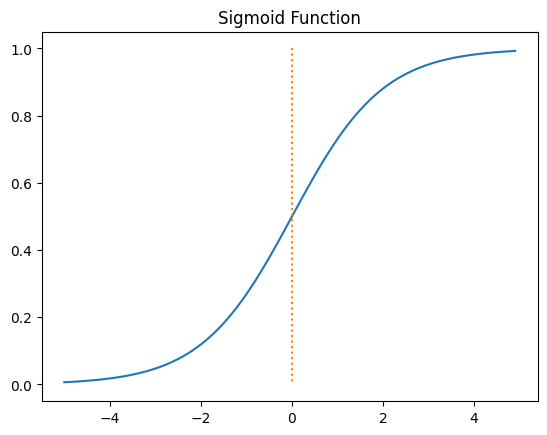

In [4]:
plt.plot(x, y)
plt.plot([0, 0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

### 1-2. 하이퍼볼릭탄젠트

* 하이퍼볼릭 사인 함수(sinh)와 하이퍼볼릭 코사인 함수(cosh)로 정의
* 신경망의 활성화 함수로 자주 사용됨
* 출력값이 -1 에서 1 사이로 조정되어 학습 과정에서 중심화된 데이터 분포를 유지
* 기울기 소실 문제를 완화하는데 도

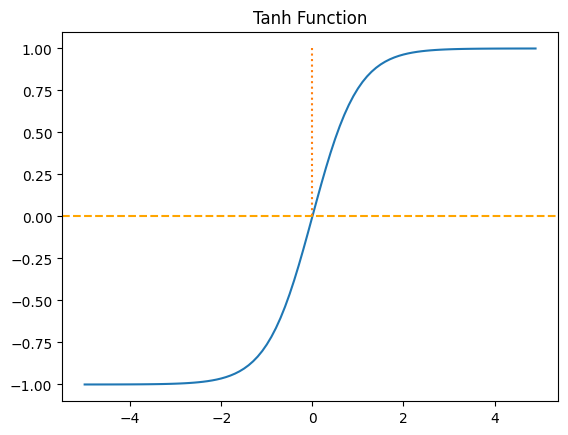

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0, 0], [1.0, 0.0], ':')
plt.axhline(y = 0, color = 'orange', linestyle = '--')
plt.title('Tanh Function')
plt.show()

### 1-3. 렐루(relu)

* 신경망에서 널리 사용되는 활성화 함수
* 입력이 양수일때는 그대로 출력하고 음수 일때는 0을 출력하는 형태
* 양수 입력에 대해 기울기가 항상 1이므로 기울기 소실 문제를 완화
* 간단한 비교 연산으로 구성되어 계산이 매우 빠름

In [7]:
def relu(x) :
    return np.maximum(0, x)

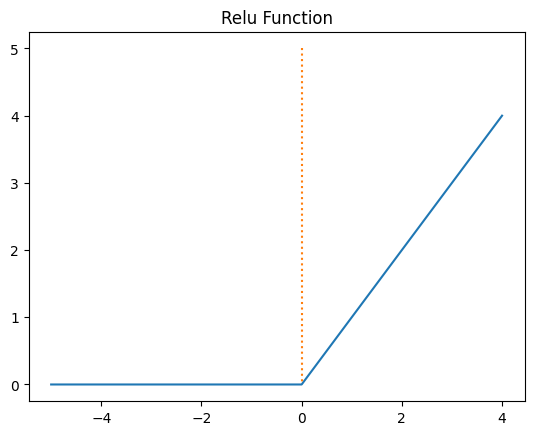

In [11]:
x = np.arange(-5.0, 5.0, 1.0)
y = relu(x)

plt.plot(x, y)
plt.plot([0, 0], [5.0, 0.0], ':')
plt.title('Relu Function')
plt.show()

### 1-4. 소프트맥스

* 신경망의 출력층에서 활성화 함수로 사용
* 분류 문제에서 각 클래스에 대한 확률을 출력하는데 유용
* 함수의 출력은 0과 1사이의 값으로 변환되며 출력값 총합은 1이됨
* 미분 가능하므로 역전파 알골리즘을 사용할 수 있음

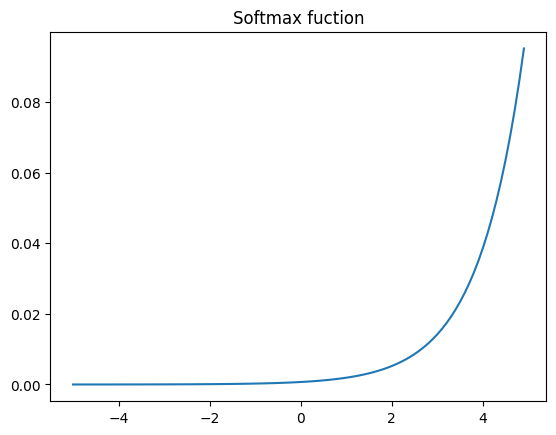

In [12]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax fuction')
plt.show()

# **2. 역전파(Backpropagation)**

* 1969년 민스키 교수님 XOR는 '지금의 기술로 풀 수 없다' 라는 것을 수학적으로 증명함
* 1974년 Paul Werbos에 의해 박사 논문에서 XOR 문제를 해결하게 됨
    * W, b 를 이용해 주어진 입력을 가지고 출력을 만들어 낼 수 있음 -> 출력이 우리가 가지고 있는 값과 다른 값일 경우 W, b를 조절함

<center><img src="https://i.imgur.com/QtiHBAE.png" width="800px"></center>

* 1980년 Hinton에 의해 위 같은 방법으로 XOR 문제를 해결해 냄(재발견)
* 역전파는 인공 신경망에서 학습을 수행하는데 사용되는 알고리즘으로 네트워크의 가중치를 업데이트 하기 위해 오차를 출력층에서 입력층으로 전파하여 각 가중치의 기울기를 계산
* 신경망이 주어진 데이터에 대해 예측을 얼마나 잘하는지 평가하고 네트워크의 가중치를 조정하여 예측 성능을 향상시키는 중요한 과정

# **3. 역전파 알고리즘의 단계**

* 순전파 계산
    * 입력 데이터를 각 층을 통과시키며 네트워크의 출력을 계산
    * 출력층에서 손실 함수를 사용하여 출력과 실제 값의 오차를 계산

* 오차 계산
    * 출력층에서 시작하여 이전 층으로 이동하며 오차를 계산
    * 출력층의 오차는 손실 함수의 미분으로 구함

* 기울기 계산
    * 각 층에서 가중치와 바이어스에 대한 기울기를 계산
    * 기울기는 오차와 활성화 함수의 미분을 사용하여 구함

* 기울기 업데이트
    * 경사 하강법을 사용하여 가중치와 바이어스를 업데이트 함